In [1]:
import numpy as np
from scipy import misc
i = misc.face(gray=True)

<ipython-input-1-167b6139b56c>:3: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  i = misc.face(gray=True)


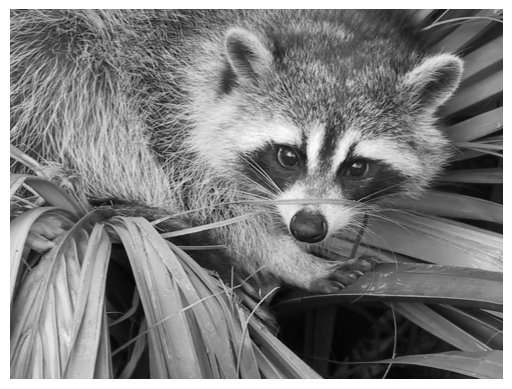

In [2]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

**Apply Filter**

In [3]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]


In [4]:
# Apply filt6er on image
filter = [[
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
]]

In [5]:
for x in range(1, size_x - 1):
    for y in range(1, size_y - 1):
        convolution = 0.0
        convolution = convolution + (i[x-1, y-1] * filter[0][0][0])
        convolution = convolution + (i[x -1, y] * filter[0][0][1])
        convolution = convolution + (i[x - 1, y + 1] * filter[0][0][2])
        convolution = convolution + (i[x, y - 1] * filter[0][1][0])
        convolution = convolution + (i[x, y] * filter[0][1][1])
        convolution = convolution + (i[x, y +1] * filter[0][1][2])
        convolution = convolution + (i[x +1, y - 1] * filter[0][2][0])
        convolution = convolution + (i[x + 1, y] * filter[0][2][1])
        convolution = convolution + (i[x + 1, y + 1] * filter[0][2][2])
        if(convolution < 0):
            convolution = 0
        if(convolution > 255):
            convolution = 255
        i_transformed[x, y] = convolution

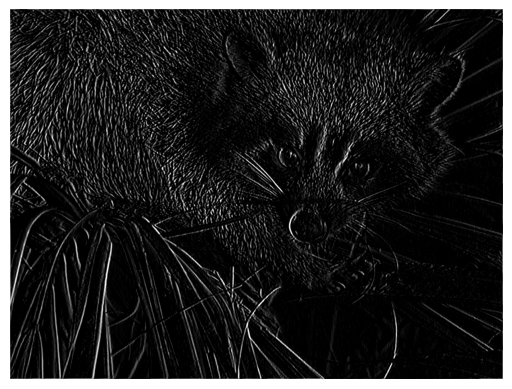

In [6]:
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i_transformed)
plt.show()

**Max Pooling**

In [7]:
new_x = int(size_x / 2)
new_y = int(size_y / 2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):
      pixles =[]
      pixles.append(i_transformed[x, y])
      pixles.append(i_transformed[x+1, y])
      pixles.append(i_transformed[x, y+1])
      pixles.append(i_transformed[x+1, y+1])
      newImage[int(x/2), int(y/2)] = max(pixles)


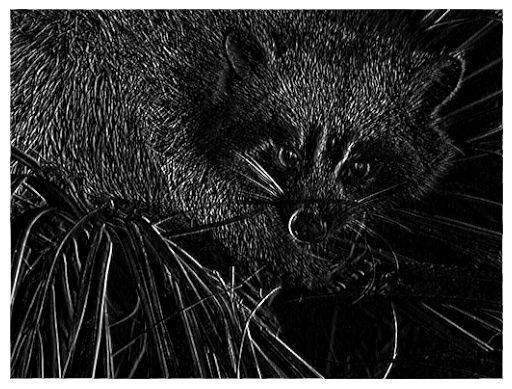

In [8]:
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(newImage)
plt.show()

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# Define the model architecture
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Generate some example data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# Train the model
model.fit(x_train, y_train, epochs=2, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', accuracy*100)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8796 - loss: 0.4348
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9635 - loss: 0.1232
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9581 - loss: 0.1374
Test accuracy: 96.23000025749207
